2025-02-17 23:55:12 - vnstock3.common.data.data_explorer - WARNING - Nguồn TCBS hiện tại chỉ hỗ trợ các thông tin về giá và giao dịch, không hỗ trợ thông tin công ty.


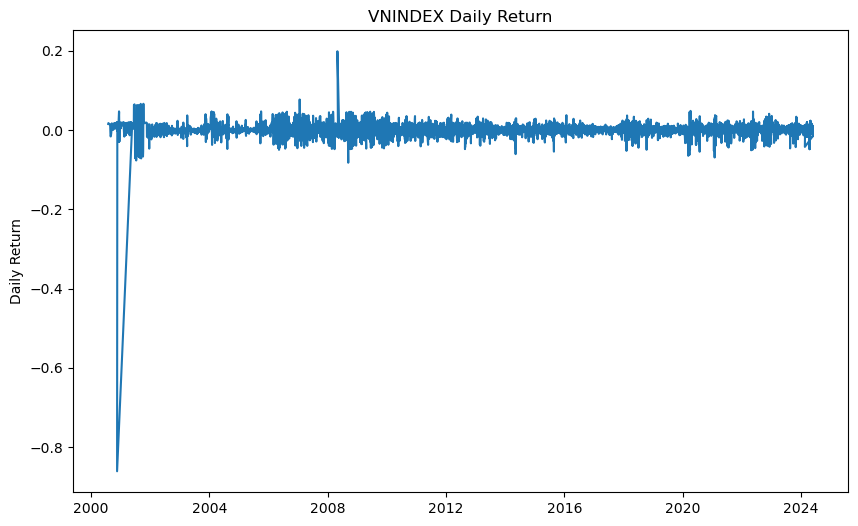

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.429150562641712e+23
Iteration:      2,   Func. Count:     21,   Neg. LLF: 10600452052814.799
Iteration:      3,   Func. Count:     36,   Neg. LLF: 8.487034249629123e+22
Iteration:      4,   Func. Count:     51,   Neg. LLF: 2029733140.0194614
Iteration:      5,   Func. Count:     63,   Neg. LLF: -16752.216644376862
Optimization terminated successfully    (Exit mode 0)
            Current function value: -16752.21658141032
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      r   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                16752.2
Distribution:                  Normal   AIC:                          -33496.4
Method:            Maximu

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003445. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.



In [1]:
#pip install vnstock3

from vnstock3 import * #import all functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

stock = Vnstock().stock(symbol='VNINDEX', source='TCBS')
data = stock.quote.history(start='2000-01-01', end='2024-05-25')

#Create a dataframe with index is time and columns are close price
df = pd.DataFrame(data['close'])
df.columns = ['close']
df.set_index(pd.to_datetime(data['time']), inplace=True)
df['r'] = np.log(df['close']/df['close'].shift(1))
df['returns']=df['close'].pct_change()

#Drop nan
df.dropna(inplace=True,axis=0)

#Plot the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df['r'])
plt.ylabel('Daily Return')
plt.title('VNINDEX Daily Return')
plt.show()

#GARCH model estimation
from arch import arch_model
model = arch_model(df['r'], p=1, q=1, vol='GARCH')
model_fit = model.fit()
print(model_fit.summary())
